<a href="https://colab.research.google.com/github/HwangJae-won/Data_project_practice/blob/main/mpg_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
df = sns.load_dataset("mpg")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

<Axes: xlabel='horsepower', ylabel='Count'>

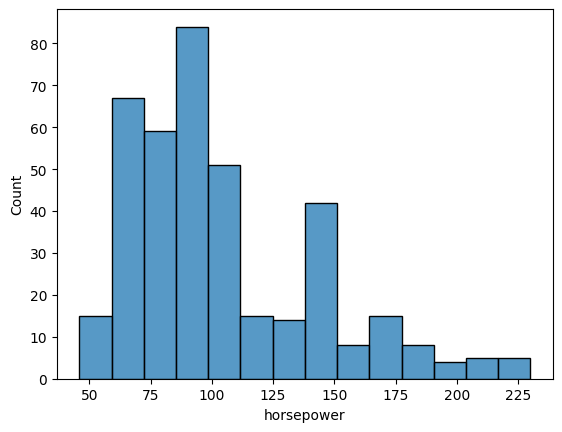

In [ ]:
sns.histplot(df.horsepower)

In [ ]:
df['horsepower']=df['horsepower'].fillna(df.horsepower.mode()[0])

<Axes: >

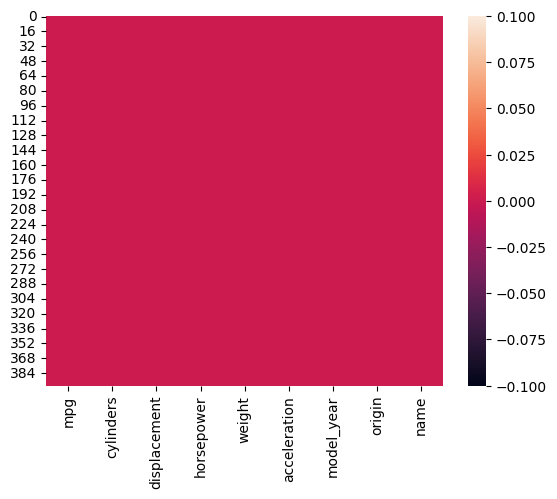

In [ ]:
sns.heatmap(df.isnull())

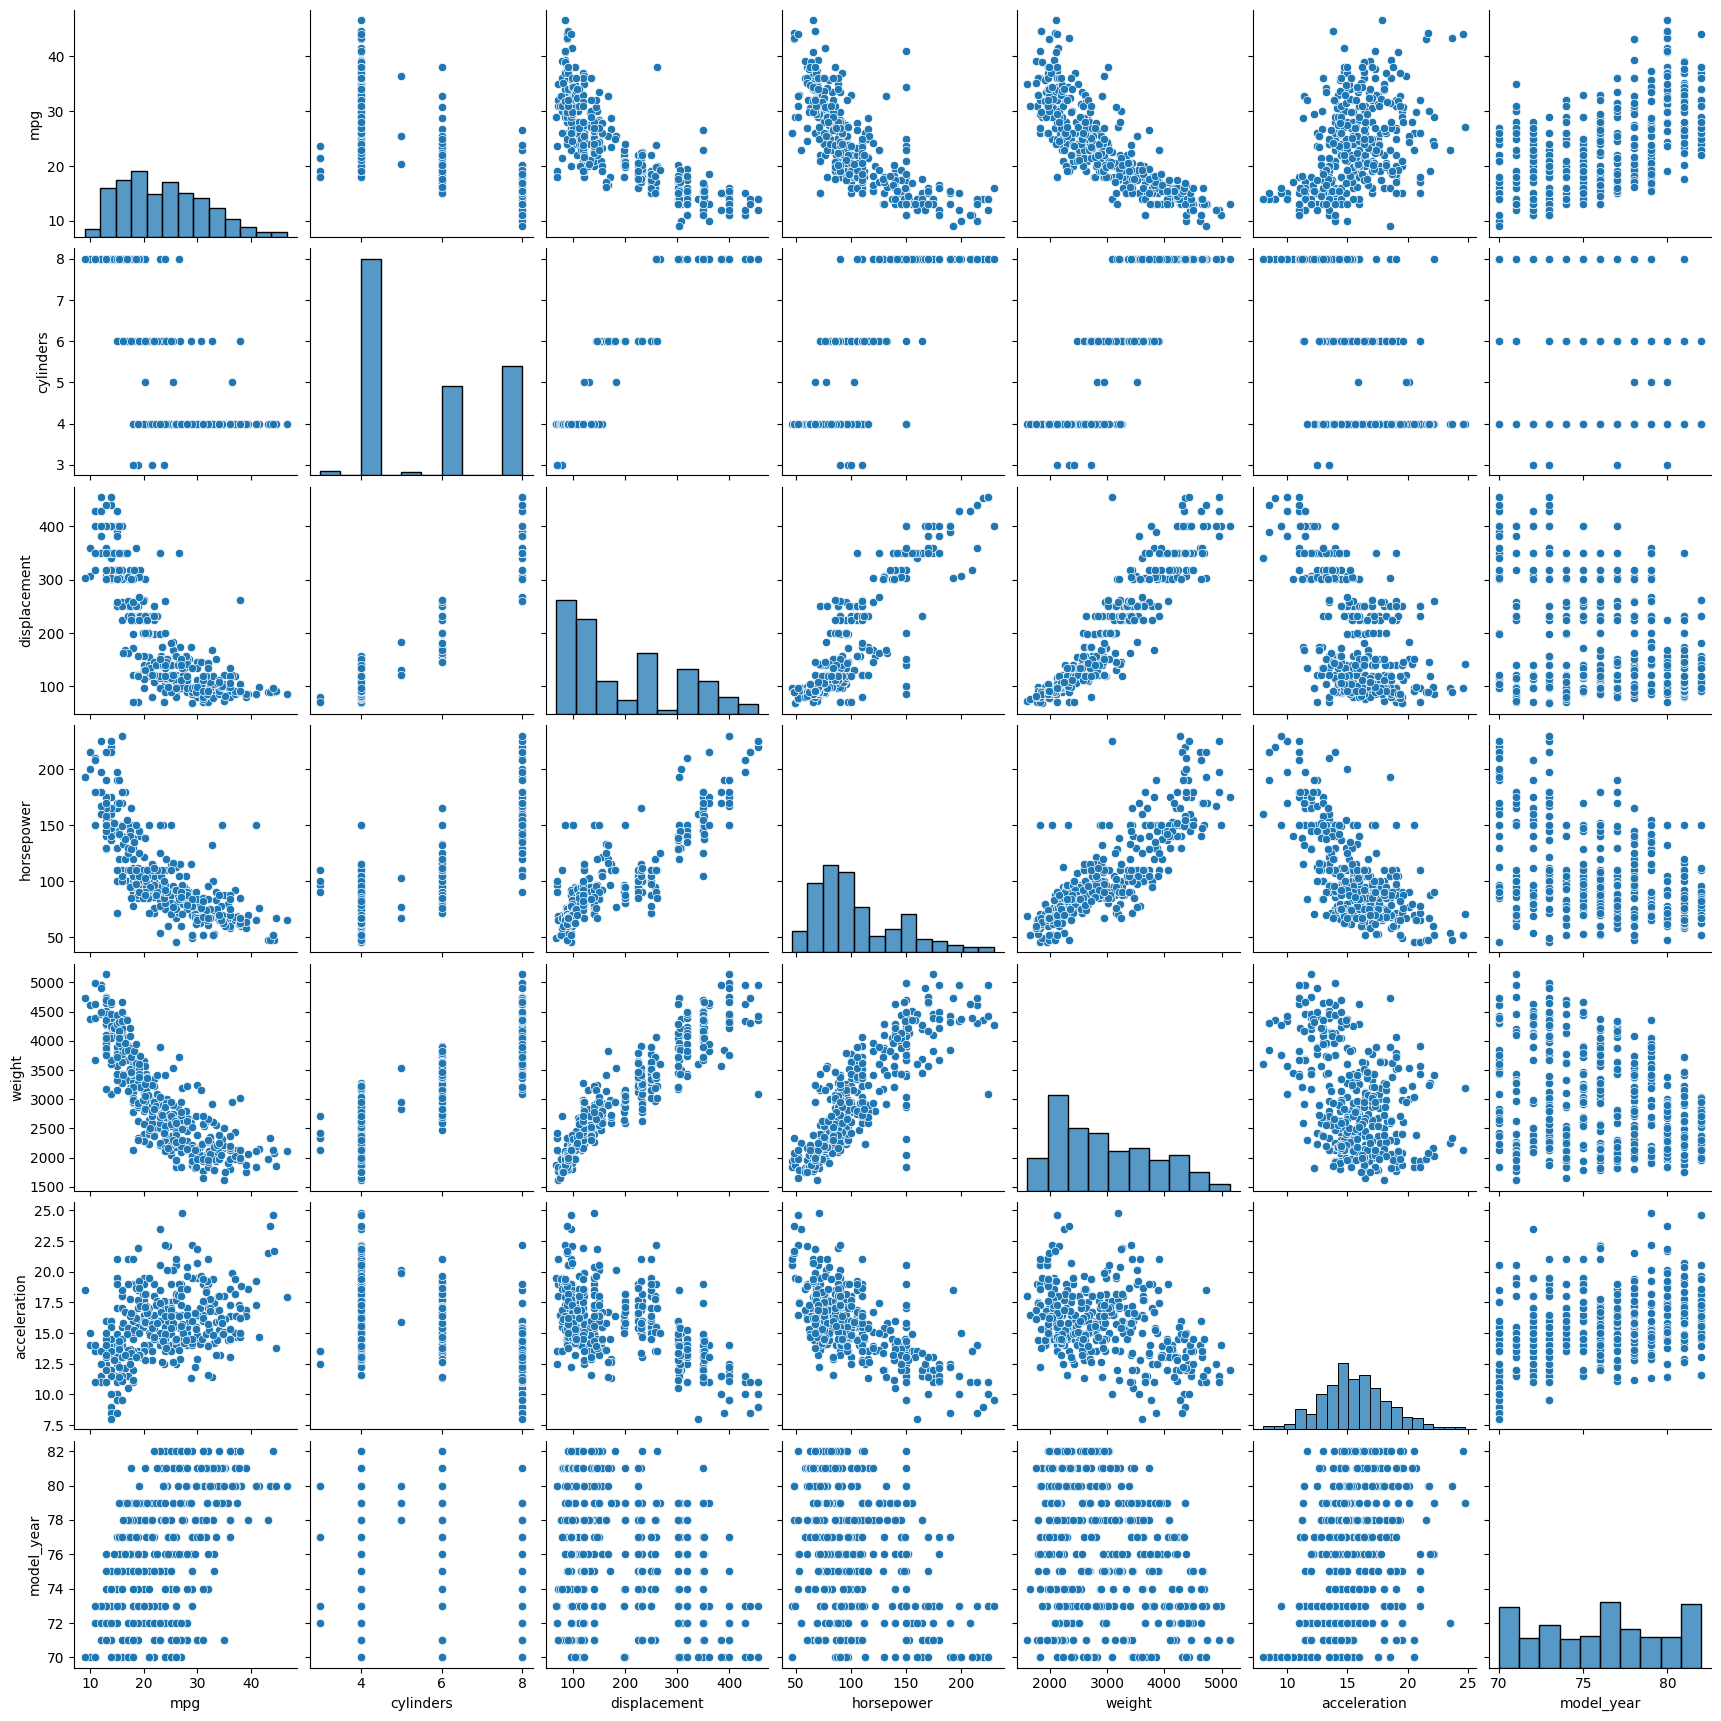

In [ ]:
sns.pairplot(df)

y가 skewed하지는 않으므로 로그 변환은 안함

<Axes: >

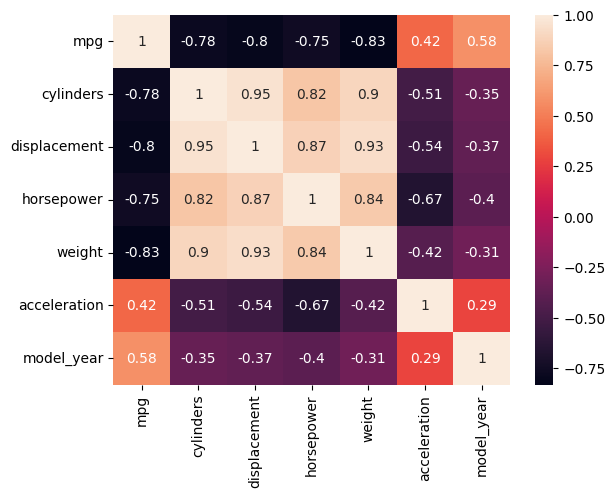

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot =True)

대부분 연관도 높음

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
import re

In [ ]:
df.drop(["name"], axis= 1, inplace =True)

In [ ]:
X = df.drop(["mpg"], axis= 1)
y = df[["mpg"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size =0.8, random_state =42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [ ]:
cat_idx =[]
for i in X.columns:
  if X[i].dtype=="object":
    cat_idx.append(i)

In [ ]:
num_idx = list(set(X.columns) - set(cat_idx))

In [ ]:
t = [('cat', OneHotEncoder(handle_unknown = "ignore"), cat_idx), ('num', StandardScaler(), num_idx)]
col_trans = ColumnTransformer(t)
col_trans

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['origin']),
                                ('num', StandardScaler(),
                                 ['acceleration', 'horsepower', 'weight',
                                  'cylinders', 'model_year', 'displacement'])])

In [ ]:
X_train_std = col_trans.fit_transform(X_train)
X_test_std = col_trans.transform(X_test)

모델링

In [ ]:
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
# !pip install catboost
from catboost import CatBoostRegressor

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
#모델 정의
lasso = Lasso()
ridge = Ridge()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
lgbm = LGBMRegressor()
catboost = CatBoostRegressor()

In [ ]:
estimators = [('La', lasso), ('Rid', ridge), ('RF', rf), ("DT", dt), ("lgbm",lgbm), ('catboost', catboost)]

In [ ]:
# 학습
stacking = StackingRegressor(estimators = estimators)
stacking.fit(X_train_std, y_train)
y_pred_stacking= stacking.predict(X_test_std)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4:	learn: 7.0527870	total: 8.94ms	remaining: 1.78s
5:	learn: 6.9603731	total: 9.36ms	remaining: 1.55s
6:	learn: 6.8592427	total: 9.75ms	remaining: 1.38s
7:	learn: 6.7665591	total: 10.1ms	remaining: 1.25s
8:	learn: 6.6755164	total: 10.4ms	remaining: 1.15s
9:	learn: 6.5855245	total: 10.8ms	remaining: 1.06s
10:	learn: 6.5082439	total: 11.1ms	remaining: 996ms
11:	learn: 6.4168376	total: 11.4ms	remaining: 939ms
12:	learn: 6.3215730	total: 11.7ms	remaining: 892ms
13:	learn: 6.2314958	total: 12.1ms	remaining: 852ms
14:	learn: 6.1463537	total: 17ms	remaining: 1.11s
15:	learn: 6.0805189	total: 17.4ms	remaining: 1.07s
16:	learn: 5.9885470	total: 17.8ms	remaining: 1.03s
17:	learn: 5.9105984	total: 18.1ms	remaining: 988ms
18:	learn: 5.8494579	total: 18.5ms	remaining: 954ms
19:	learn: 5.7630340	total: 18.8ms	remaining: 921ms
20:	learn: 5.6998644	total: 19.1ms	remaining: 891ms
21:	learn: 5.6233059	total: 19.3ms	remaining: 857ms
22:	learn: 5.5391542	total: 19.6ms	r

In [ ]:
np.sqrt(mse(y_pred_stacking, y_test))

3.0381347565078647

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 1, 2, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

rf_cv = RandomizedSearchCV(rf, params, n_iter = 10, random_state = 42)
rf_cv = rf_cv.fit(X_train, y_train)
y_rf_cv = rf_cv.predict(X_test)

# 예측 결과
# 로그변환하였으므로 다시 원래대로 변환한 값으로 평가
print(rf_cv.best_params_)  # 교차검증으로 구한 최적의 하이퍼파라미터들
print(np.sqrt(MSE(np.exp(y_test), np.exp(y_rf_cv))))